**Цель:** закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.  
**Описание задания:**.
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/athletes.csv')
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


### 1. Преобразуйте данные:

#### * проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
cols  = data.columns
for i, el in enumerate(cols):
    print(f'{i, el} : {data[el].unique()}\n\n')


(0, 'id') : [736041664 532037425 435962603 ...  88361042 900065925 711404576]


(1, 'name') : ['A Jesus Garcia' 'A Lam Shin' 'Aaron Brown' ... 'di Xiao'
 'le Quoc Toan Tran' 'le Roux Hamman']


(2, 'nationality') : ['ESP' 'KOR' 'CAN' 'MDA' 'NZL' 'AUS' 'USA' 'ETH' 'BRN' 'IOA' 'GBR' 'UZB'
 'RSA' 'EGY' 'MAR' 'QAT' 'SUD' 'ALG' 'DEN' 'NED' 'DJI' 'SEN' 'CMR' 'ITA'
 'NIG' 'SWE' 'GHA' 'AFG' 'AZE' 'KSA' 'BAN' 'NGR' 'RUS' 'IND' 'HUN' 'KAZ'
 'BDI' 'ERI' 'POL' 'BRA' 'GEO' 'CZE' 'SEY' 'GAM' 'LTU' 'IRI' 'ROU' 'CUB'
 'SLO' 'BAH' 'ARG' 'PUR' 'FRA' 'RWA' 'TOG' 'MDV' 'TUN' 'ISR' 'LAT' 'JOR'
 'MAS' 'LIB' 'LBA' 'PLE' 'IRQ' 'TUR' 'VEN' 'JPN' 'TPE' 'KGZ' 'CHN' 'MEX'
 'GRE' 'IRL' 'JAM' 'SUI' 'BAR' 'HON' 'ANG' 'GER' 'COL' 'URU' 'MNE' 'SRB'
 'BUL' 'FIN' 'UKR' 'BLR' 'SMR' 'COK' 'SAM' 'AUT' 'BEL' 'KEN' 'SVK' 'POR'
 'ECU' 'UAE' 'NAM' 'GUY' 'EST' 'SKN' 'ARU' 'PAN' 'PER' 'TAN' 'FIJ' 'GUI'
 'NOR' 'ARM' 'THA' 'SIN' 'TKM' 'CRO' 'BIH' 'TGA' 'MAW' 'DOM' 'GUA' 'MKD'
 'TJK' 'CYP' 'CHI' 'MLT' 'ZIM' 'TTO' 'CRC' 'BOL' 'BUR' 

In [ ]:
# количество пустых с height

pd.isnull(data['height']).value_counts().to_frame()

,height
False,11208
True,330


In [ ]:
# количество пустых с weight
pd.isnull(data['weight']).value_counts().to_frame()

,weight
False,10879
True,659


In [ ]:
# количество пустых с dob
pd.isnull(data['dob']).value_counts().to_frame()

,dob
False,11537
True,1


In [ ]:
data = data.dropna(axis = 0) # удаление строк с пустыми значениями

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


#### * закодируйте категориальные переменные числовыми значениями по необходимости.

In [ ]:
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# подготовка таргетной переменной
le.fit(data['sex'])

LabelEncoder()

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
le.transform(data['sex'])

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# записываем в таргетную переменную y преобразованный столбец
y = pd.Series(data = le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [ ]:
# отбор признаков и запись их в x
X = data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']]

# кодирование колонки sport
X = pd.get_dummies (X, columns = ['sport', 'nationality'])
X.head()


,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM
0,1.72,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества. Обучение модели

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42) # разделение на тестовую и тренировочную выборки

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions # предсказания

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
model.predict_proba(X_test) # вероятности

array([[0.04576462, 0.95423538],
       [0.03080615, 0.96919385],
       [0.6200949 , 0.3799051 ],
       ...,
       [0.02314918, 0.97685082],
       [0.87007054, 0.12992946],
       [0.2974616 , 0.7025384 ]])

In [ ]:
model.score(X_train, y_train)

0.8335252129864149

In [ ]:
model.score(X_test, y_test)

0.8162983425414365

### 3.Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
predictions = model.predict_proba(X_test) # вероятности

In [ ]:
# получение значений false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [ ]:
from matplotlib import pyplot as plt

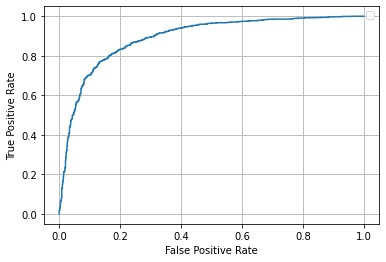

In [ ]:
plt.plot(fpr, tpr )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()


### 4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.8915890784539159

#### 5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [ ]:
# функция для подсчета количества tp, fp, fn, tn
def tpr_fpr(y_prd, y_tst, threshold):

    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    for predicted_prob, actual in zip(y_prd[:, 1], y_tst):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp, fp, fn, tn

In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
fpr_ = []
tpr_ = []
threshold = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 0.95, 0.999]

for el in threshold:
    res = tpr_fpr(y_pred_proba, y_test, el)
    fpr_.append(res[1] / (res[1] + res[3]))
    tpr_.append(res[0] / (res[0] + res[2]))

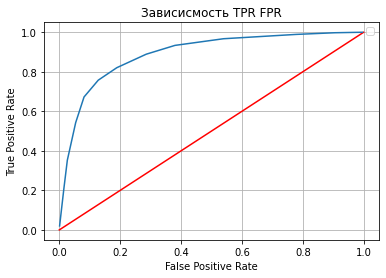

In [ ]:
x = [0, 1]
y = x
plt.plot(x, y, color = 'red')
plt.plot(fpr_, tpr_)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Зависисмость TPR FPR')
plt.legend(loc=0)
plt.grid()
plt.show()


### 6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 5 в один. Сравните, сделайте вывод.

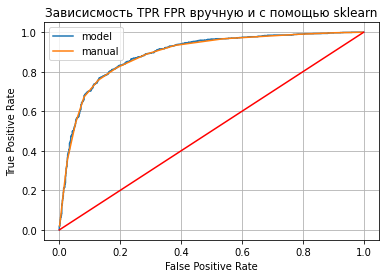

In [ ]:
x = [0, 1]
y = x
plt.plot(fpr, tpr, label='model' )
plt.plot(fpr_, tpr_, label='manual' )
plt.plot(x, y, color = 'red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Зависисмость TPR FPR вручную и с помощью sklearn')
plt.legend(loc=0)
plt.grid()
plt.show()


Вывод: графики практически совпали, значит алгоритм вычисления вручную работает правильно.

### 7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

In [ ]:
precision = []
recall = []

# threshold = [0.1, 0.2, 0.3, 0.5, 0.6, 0.75, 0.9]
threshold = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8, 0.9, 0.95, 0.999]

# threshold = y_pred_proba.
for el in threshold:
    res = tpr_fpr(y_pred_proba, y_test, el)
    precision.append(res[0] / (res[0] + res[1]))
    recall.append(res[0] / (res[0] + res[2]))


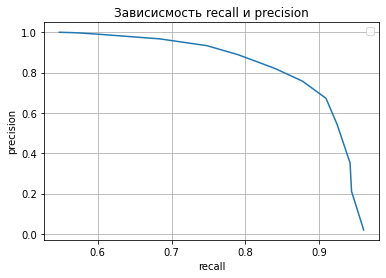

In [ ]:
plt.plot(precision, recall)

plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Зависисмость recall и precision')
plt.legend(loc=0)
plt.grid()
plt.show()

### 8. Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [ ]:
from sklearn.metrics import auc
# метрики, посчитанные вручную
auc(fpr_, tpr_)

0.8856874127453395

In [ ]:
# метрики из sklearn
auc(fpr, tpr)

0.8915890784539159

### 9.Сформулируйте выводы по проделанной работе:

* как по полученным графикам сделать вывод о качестве модели?

Чем выше кривая ROC, тем модель лучше, tpr и fpr должны стремиться к единице

* Как вы оцениваете обученную модель исходя из подсчитанных метрик?

Модель довольно хорошо обучена


* может ли ROC-кривая проходить ниже диагонали?

наверное, может, но не должна, это будет говорить об очень плохой модели